<a href="https://colab.research.google.com/github/capofwesh20/Masters-Thesis/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [ ]:
# Attempt to read and analyze the provided lifetime files for statistical distribution analysis

import numpy as np

# List of file paths for photon counts data
photon_files = [
     '/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2/F+-1_t1.npy',
     '/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2/F+-2_t1.npy',
     '/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2/F+-3_t1.npy',
     '/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2/F+-4_t1.npy',
     '/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2/F+-5_t1.npy',
     '/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2/F+-6_t1.npy',
     '/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2/F+-7_t1.npy',
     '/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2/F++1 Redone_t1.npy',
     '/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2/F++2 Redone_t1.npy',
     '/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2/F++3 Redone_t1.npy',
     '/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2/F++4 Redone_t1.npy',
     '/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2/F++5 Redone_t1.npy',
     '/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2/F++6 Redone_t1.npy',
     '/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2/F++7 Redone_t1.npy',
     '/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2/Rot 1_t1.npy',
     '/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2/Rot 2_t1.npy',
     '/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2/Rot 3_t1.npy',
     '/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2/Rot 4_t1.npy',
     '/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2/Rot 5_t1.npy',
     '/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2/Rot 6_t1.npy',
     '/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2/Rot 7_t1.npy',
]

# Load and concatenate all photon count data
photon_data_all = []
for file_path in photon_files:
    try:
        photon_data = np.load(file_path)
        photon_data_all.append(photon_data.flatten())
    except Exception as e:
        print(f"Error reading {file_path}: {e}")

# Combine all photon data into a single array for analysis
all_photon_counts = np.concatenate(photon_data_all)

# Calculate descriptive statistics for photon counts

min_photon_counts = np.min(all_photon_counts)
max_photon_counts = np.max(all_photon_counts)

min_photon_counts, max_photon_counts


(0.00511826, 1.44831)

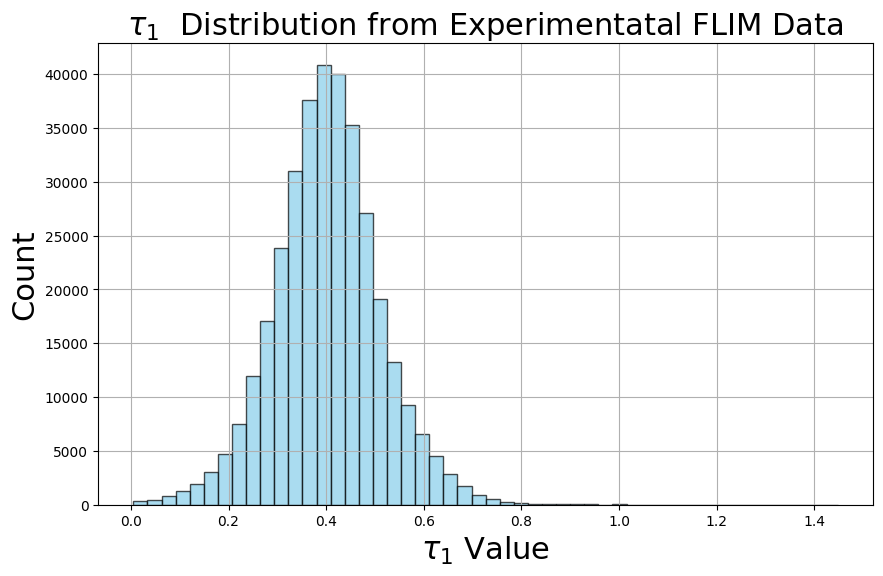

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(all_photon_counts.flatten(), bins=50, color='skyblue', edgecolor='black', alpha=0.7, )
plt.title(r'$\tau_1$  Distribution from Experimentatal FLIM Data', fontsize=22)
plt.xlabel(r'$\tau_1$ Value', fontsize=22)
plt.ylabel("Count", fontsize=22)
plt.grid(True)
plt.show()

In [ ]:
#verify masking

a1_data = np.loadtxt('/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2/Rot 1_a1.asc')
a2_data = np.loadtxt('/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2/Rot 1_a2.asc')
a1_mask = (a1_data > 0)
a2_mask = (a2_data > 0)
nzeropixels_a1 = np.sum(a1_mask)
nzeropixels_a2 = np.sum(a2_mask)

#compare the number of zero pixels in the a1 and a2 files...they are the same (443)
np.sum(a2_data == 0)
np.sum(a1_data == 0)
#np.sum(binned_intensity.sum(axis=2) == 0)


0

In [ ]:
flim_data_folder = '/content/drive/MyDrive/OneDrive_2024-10-26/2024-02-29 SCC74A High O2 - thresh 27'

# List all files in the folder
flim_files = [f for f in os.listdir(flim_data_folder) if f.endswith('.npy')]


Global Maximum Photon Count in the Image

In [ ]:
import numpy as np

# Assuming you have an input image with shape (height, width, time_gates)
# For example, load the input image (FLIM decay data) from a .npy file
decay_data = np.load('/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2/binned_F+-1_Ch2.npy')  # Shape could be (128, 128, 256)

# Calculate the maximum photon count for each pixel across all time gates
# This operation will take the maximum value along the time axis (axis=2)
max_photon_count = np.max(decay_data, axis=2)

# The result (max_photon_count) will have shape (height, width), showing the max count for each pixel
print("Max Photon Count for Each Pixel:")
print(max_photon_count)

# To check the global maximum photon count in the entire image:
global_max_photon_count = np.max(max_photon_count)
print(f"Global Maximum Photon Count in the Image: {global_max_photon_count}")

# You can also find the pixel location of the maximum photon count
max_photon_pixel_location = np.unravel_index(np.argmax(max_photon_count), max_photon_count.shape)
print(f"Pixel Location with Maximum Photon Count: {max_photon_pixel_location}")


Max Photon Count for Each Pixel:
[[ 80. 173. 176. ...  20.  20.  12.]
 [115. 229. 227. ...  24.  24.  16.]
 [118. 240. 249. ...  20.  25.  18.]
 ...
 [192. 300. 250. ...  28.  23.  16.]
 [212. 331. 272. ...  27.  21.  13.]
 [151. 241. 204. ...  15.  10.   5.]]
Global Maximum Photon Count in the Image: 1495.0
Pixel Location with Maximum Photon Count: (60, 88)


function to bin images.

In [ ]:

# Directory containing the images
flim_data_folder = '/content/drive/MyDrive/OneDrive_2024-11-13 (1)/2024-03-12 SCC74A High O2'

# List all files in the folder
flim_files = [f for f in os.listdir(flim_data_folder) if f.endswith('.npy')]

# Function to bin nearest neighbor pixels
def bin_pixels(f, xcenter, ycenter, nbin):
    """ This function combines the decays of nbin nearest neighbor pixels
    f is a two or three dimensional array x,y (,t)
    xcenter,ycenter is the center coordinate
    nbin is the number of nearest neighbors
    the function returns the total binned intensity or decay
    """
    s = f.shape
    nr = s[0]
    nc = s[1]
    xmin = xcenter - nbin if (xcenter > nbin) else 0
    ymin = ycenter - nbin if (ycenter > nbin) else 0
    xmax = xcenter + nbin + 1 if (xcenter < nr - nbin) else nr
    ymax = ycenter + nbin + 1 if (ycenter < nc - nbin) else nc

    if len(s) == 3:
        nt = s[2]
        total = np.zeros(nt)
    else:
        total = 0
    for x in range(int(xmin), int(xmax)):
        for y in range(int(ymin), int(ymax)):
            total = np.add(f[x][y], total)
    return total

# Function to bin all pixels in an image
def bin_all_pixels(f, nbin):
    print("Creating binned image")
    xpix, ypix = f.shape[0:2]
    bin_image = np.zeros(f.shape)
    for x in range(xpix):
        for y in range(ypix):
            bin_image[x][y] = bin_pixels(f, x, y, nbin)
    return bin_image

# Iterate through each file, apply binning, calculate intensity, and save results
for file_name in flim_files:
    # Load the decay data
    file_path = os.path.join(flim_data_folder, file_name)
    decay_data = np.load(file_path)

    # Apply binning to the entire image with a specified value for nbin (e.g., nbin=1)
    nbin = 1
    binned_data = bin_all_pixels(decay_data, nbin)

    # Save the binned image as a .npy file
    binned_file_name = f"binned_{file_name}"
    binned_file_path = os.path.join(flim_data_folder, binned_file_name)
    np.save(binned_file_path, binned_data)

    print(f"Binned image saved as {binned_file_name}")


Creating binned image
Binned image saved as binned_Control 5_Ch2.npy
Creating binned image
Binned image saved as binned_Control 4_Ch2.npy
Creating binned image
Binned image saved as binned_Control 3_Ch2.npy
Creating binned image
Binned image saved as binned_Control 2_Ch2.npy
Creating binned image
Binned image saved as binned_Control 1_Ch2.npy
Creating binned image
Binned image saved as binned_F++ 5_Ch2.npy
Creating binned image
Binned image saved as binned_F++ 4_Ch2.npy
Creating binned image
Binned image saved as binned_F++ 3_Ch2.npy
Creating binned image
Binned image saved as binned_F++ 2_Ch2.npy
Creating binned image
Binned image saved as binned_F++ 1_Ch2.npy
Creating binned image
Binned image saved as binned_Control 7_Ch2.npy
Creating binned image
Binned image saved as binned_Control 6_Ch2.npy
Creating binned image
Binned image saved as binned_F+- 5_Ch2.npy
Creating binned image
Binned image saved as binned_F+- 4_Ch2.npy
Creating binned image
Binned image saved as binned_F+- 3_Ch2.n

In [ ]:
intensity_data = np.sum(d, axis=2)

    # Find the max and min intensity values and their pixel locations
max_intensity = np.max(intensity_data)
min_intensity = np.min(intensity_data)

    # Get the pixel locations for the minimum intensity values
min_intensity_location = np.unravel_index(np.argmin(intensity_data), intensity_data.shape)

    # Print the results for each image
print(f"Image: {file_name}")
print(f"Max Intensity: {max_intensity}")
print(f"Min Intensity: {min_intensity} at Pixel Location: {min_intensity_location}\n")


Image: Control 6_Ch2.npy
Max Intensity: 15960.0
Min Intensity: 266.0 at Pixel Location: (0, 53)



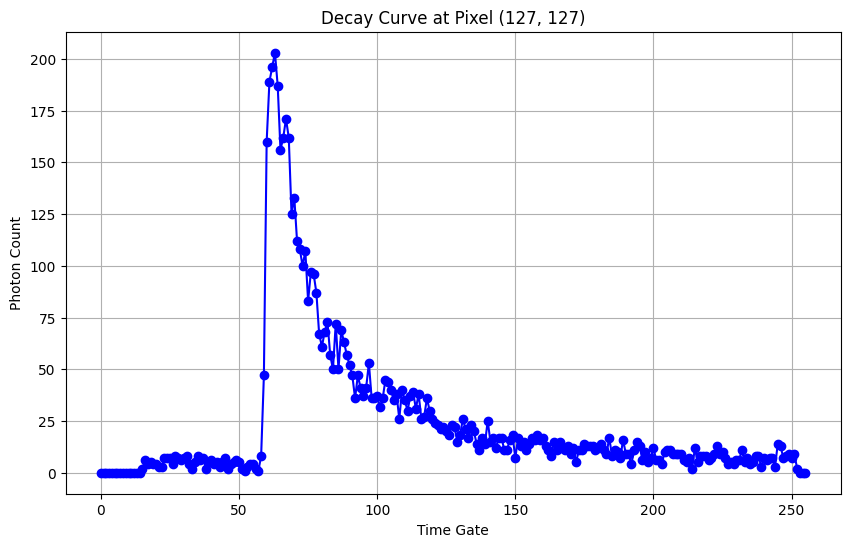

In [ ]:
# Extract the decay data for pixel (191, 213)
pixel_decay_data_127_127 = d[127, 109, :]

# Plot the decay graph for pixel (127, 127)
plt.figure(figsize=(10, 6))
plt.plot(pixel_decay_data_127_127, marker='o', linestyle='-', color='b')
plt.xlabel('Time Gate')
plt.ylabel('Photon Count')
plt.title('Decay Curve at Pixel (127, 127)')
plt.grid(True)
plt.show()


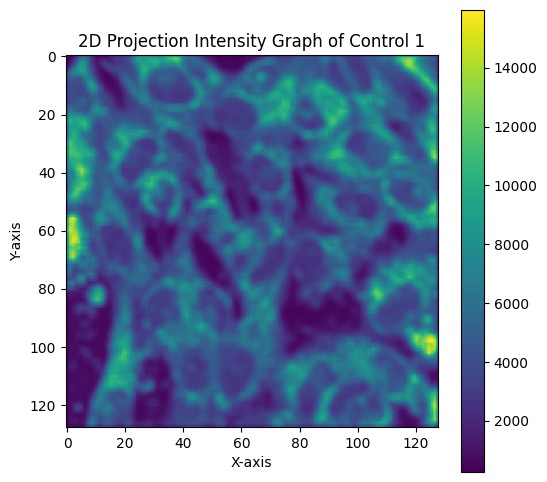

In [ ]:
intensity = d.sum(axis=2)
# Plot the normalized intensity projection
plt.figure(figsize=(6, 6))
plt.imshow(intensity, cmap='viridis')
plt.colorbar()
plt.title('2D Projection Intensity Graph of Control 1')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

Converting asc files to npy

In [ ]:
path_to_files = '/content/drive/MyDrive/OneDrive_2024-10-26/2024-02-29 SCC74A High O2 - thresh 27/*.asc'

file_paths = glob.glob(path_to_files)

# Loop through each file path
for file_path in file_paths:

    data = np.loadtxt(file_path)

    output_file_path = file_path.replace('.asc', '.npy')


    np.save(output_file_path, data)

    print(f"Saved {output_file_path}")


Saved /content/drive/MyDrive/OneDrive_2024-10-26/2024-02-29 SCC74A High O2 - thresh 27/Control 1_t2.npy
Saved /content/drive/MyDrive/OneDrive_2024-10-26/2024-02-29 SCC74A High O2 - thresh 27/Control 1_offset.npy
Saved /content/drive/MyDrive/OneDrive_2024-10-26/2024-02-29 SCC74A High O2 - thresh 27/Control 1_t1.npy
Saved /content/drive/MyDrive/OneDrive_2024-10-26/2024-02-29 SCC74A High O2 - thresh 27/Control 1_photons.npy
Saved /content/drive/MyDrive/OneDrive_2024-10-26/2024-02-29 SCC74A High O2 - thresh 27/Control 1_a2.npy
Saved /content/drive/MyDrive/OneDrive_2024-10-26/2024-02-29 SCC74A High O2 - thresh 27/Control 1_a1.npy
Saved /content/drive/MyDrive/OneDrive_2024-10-26/2024-02-29 SCC74A High O2 - thresh 27/Control 2_t1.npy
Saved /content/drive/MyDrive/OneDrive_2024-10-26/2024-02-29 SCC74A High O2 - thresh 27/Control 2_t2.npy
Saved /content/drive/MyDrive/OneDrive_2024-10-26/2024-02-29 SCC74A High O2 - thresh 27/Control 2_photons.npy
Saved /content/drive/MyDrive/OneDrive_2024-10-26/2

Function to convert $\tau_1$ $\tau_2$ to nanoseconds

In [ ]:
# Function to process the files
def process_files(directory):
    # Loop through all files in the specified directory
    for filename in os.listdir(directory):
        if filename.endswith('t1.npy'):
            # Load the file
            array = np.load(os.path.join(directory, filename))
            # Perform the division
            array = array / 1000
            # Save the modified array back
            np.save(os.path.join(directory, filename), array)
        elif filename.endswith('t2.npy'):
            # Load the file
            array = np.load(os.path.join(directory, filename))
            # Perform the division
            array = array / 1000
            # Save the modified array back
            np.save(os.path.join(directory, filename), array)
        # elif filename.endswith('offset.npy'):
        #     # Load the file
        #     array = np.load(os.path.join(directory, filename))
        #     # Perform the division
        #     array = array / 1000
        #     # Save the modified array back
        #     np.save(os.path.join(directory, filename), array)



# Specify the directory containing the .npy files
directory = '/content/drive/MyDrive/OneDrive_2024-10-26/2024-02-29 SCC74A High O2 - thresh 27'

# Call the function to process the files
process_files(directory)


Not necessary but this function help you convert the amplitudes to fractional amplitudes

In [ ]:
epsilon = 1e-10  # Small value to avoid division by zero

def process_a1_a2_ratio(directory):
    # Loop through all files in the specified directory
    for control_num in range(1, 8):  # Assuming 7 controls
        # Load the corresponding a1 and a2 files for each control
        a1_file = f'Rot {control_num}_a1.npy'
        a2_file = f'Rot {control_num}_a2.npy'
        # Construct the full file paths
        a1_path = os.path.join(directory, a1_file)
        a2_path = os.path.join(directory, a2_file)


        if os.path.exists(a1_path) and os.path.exists(a2_path):
            # Load the a1 and a2 arrays
            a1_array = np.load(a1_path)
            a2_array = np.load(a2_path)

            # Compute the ratio
            ratio = a1_array / (a1_array + a2_array + epsilon)

            # Save the ratio as a new .npy file
            ratio_file = f'Rot {control_num}_ratio.npy'
            ratio_path = os.path.join(directory, ratio_file)
            np.save(ratio_path, ratio)

            print(f'Saved {ratio_file} successfully.')
        else:
            print(f'Missing a1 or a2 file for Control {control_num}.')

# Specify the directory containing the .npy files
directory = '/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2'

# Call the function to process the files
process_a1_a2_ratio(directory)


Saved Rot 1_ratio.npy successfully.
Saved Rot 2_ratio.npy successfully.
Saved Rot 3_ratio.npy successfully.
Saved Rot 4_ratio.npy successfully.
Saved Rot 5_ratio.npy successfully.
Saved Rot 6_ratio.npy successfully.
Saved Rot 7_ratio.npy successfully.


In [ ]:
import os
import numpy as np

def save_control_data_to_npz(directory, output_directory, num_controls=7):
    """
    Save .npy data files for a specific control group into .npz format.

    Parameters:
        directory (str): Directory containing the input .npy files.
        output_directory (str): Directory where .npz files will be saved.
        num_controls (int): Number of controls to process.
    """
    os.makedirs(output_directory, exist_ok=True)  # Create output directory if it doesn't exist

    for control_num in range(1, num_controls + 1):
        # Construct file paths for the necessary .npy files for each control
        sigD_file = f'masked_npyfile{control_num}.npy'
        t1_file = f'Control {control_num}_t1.npy'
        t2_file = f'Control {control_num}_t2.npy'
        a1_file = f'Control_normalized{control_num}_a1.npy'
        a2_file = f'Control_normalized{control_num}_a2.npy'
        A0_file = f'Control_normalized{control_num}_offset.npy'

        # Create full paths to the files
        sigD_path = os.path.join(directory, sigD_file)
        t1_path = os.path.join(directory, t1_file)
        t2_path = os.path.join(directory, t2_file)
        a1_path = os.path.join(directory, a1_file)
        a2_path = os.path.join(directory, a2_file)
        A0_path = os.path.join(directory, A0_file)

        # Check if all files exist before proceeding
        if all(map(os.path.exists, [sigD_path, t1_path, t2_path, a1_path, a2_path, A0_path])):
            try:
                # Load the .npy files
                sigD = np.load(sigD_path)
                t1 = np.load(t1_path)
                t2 = np.load(t2_path)
                a1 = np.load(a1_path)
                a2 = np.load(a2_path)
                A0 = np.load(A0_path)

                # Create the output file name for the .npz file
                output_file = os.path.join(output_directory, f'data3_Control{control_num}.npz')

                # Save them into an .npz file
                np.savez(output_file, sigD=sigD, t1=t1, t2=t2, a1=a1, a2=a2, A0=A0)

                print(f'Successfully saved: {output_file}')
            except Exception as e:
                print(f"Error processing Control {control_num}: {e}")
        else:
            print(f"Missing files for Control {control_num}, skipping...")

# Specify the directory containing the .npy files and the output directory
input_directory = '/content/drive/MyDrive/OneDrive_2024-10-26/2024-02-29 SCC74A High O2 - thresh 27'
output_directory = '/content/drive/MyDrive/collationwork4'

# Call the function to process all controls
save_control_data_to_npz(input_directory, output_directory)


Successfully saved: /content/drive/MyDrive/collationwork4/data3_Control1.npz
Successfully saved: /content/drive/MyDrive/collationwork4/data3_Control2.npz
Successfully saved: /content/drive/MyDrive/collationwork4/data3_Control3.npz
Successfully saved: /content/drive/MyDrive/collationwork4/data3_Control4.npz
Successfully saved: /content/drive/MyDrive/collationwork4/data3_Control5.npz
Successfully saved: /content/drive/MyDrive/collationwork4/data3_Control6.npz
Successfully saved: /content/drive/MyDrive/collationwork4/data3_Control7.npz


In [ ]:
def save_control_data_to_npz(directory, output_directory, num_controls=7):
    os.makedirs(output_directory, exist_ok=True)
    for control_num in range(1, num_controls + 1):
        # Construct file paths for the necessary .npy files for each control
        sigD_file = f'F++_masked{control_num}.npy'
        t1_file = f'F++_masked{control_num}_t1.npy'
        t2_file = f'F++_masked{control_num}_t2.npy'
        a1_file = f'F++_normalized{control_num}_a1.npy'
        a2_file = f'F++_normalized{control_num}_a2.npy'
        A0_file = f'F++_normalized{control_num}_offset.npy'

        # Create full paths to the files
        sigD_path = os.path.join(directory, sigD_file)
        t1_path = os.path.join(directory, t1_file)
        t2_path = os.path.join(directory, t2_file)
        a1_path = os.path.join(directory, a1_file)
        a2_path = os.path.join(directory, a2_file)
        A0_path = os.path.join(directory, A0_file)

        # Check if all files exist before proceeding
        if os.path.exists(sigD_path) and os.path.exists(t1_path) and os.path.exists(t2_path) and os.path.exists(a1_file):
            # Load the .npy files
            sigD = np.load(sigD_path)
            t1 = np.load(t1_path)
            t2 = np.load(t2_path)
            a1 = np.load(a1_path)
            a2 = np.load(a2_path)
            A0 = np.load(A0_path)

            # Create the output file name for the .npz file
            output_file = os.path.join(output_directory, f'data3_F++{control_num}.npz')

            # Save them into an .npz file
            np.savez(output_file, sigD=sigD, t1=t1, t2=t2, a1=a1, a2=a2, A0=A0)

            print(f'Successfully saved: {output_file}')
        else:
            print(f'Missing files for Control {control_num}, skipping...')

# Specify the directory containing the .npy files and the output directory
input_directory = '/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2'
output_directory = '/content/drive/MyDrive/collationwork4'

# Call the function to process all controls
save_control_data_to_npz(input_directory, output_directory)


Missing files for Control 1, skipping...
Missing files for Control 2, skipping...
Missing files for Control 3, skipping...
Missing files for Control 4, skipping...
Missing files for Control 5, skipping...
Missing files for Control 6, skipping...
Missing files for Control 7, skipping...


In [ ]:
import os

files_in_directory = os.listdir(input_directory)
print("Files in the directory:")
print(files_in_directory)


Files in the directory:
['F++1 Redone_Ch2.npy', 'F++2 Redone_Ch2.npy', 'F++4 Redone_Ch2.npy', 'F++5 Redone_Ch2.npy', 'F++3 Redone_Ch2.npy', 'F++7 Redone_Ch2.npy', 'F+-1_Ch2.npy', 'F++6 Redone_Ch2.npy', 'F+-3_Ch2.npy', 'F+-2_Ch2.npy', 'F+-6_Ch2.npy', 'F+-4_Ch2.npy', 'F+-5_Ch2.npy', 'Rot 1_Ch2.npy', 'Rot 2_Ch2.npy', 'F+-7_Ch2.npy', 'Rot 4_Ch2.npy', 'Rot 3_Ch2.npy', 'Rot 5_Ch2.npy', 'Rot 7_Ch2.npy', 'Rot 6_Ch2.npy', 'binned_F++7 Redone_Ch2.npy', 'binned_F++6 Redone_Ch2.npy', 'binned_F++5 Redone_Ch2.npy', 'binned_F++4 Redone_Ch2.npy', 'binned_F++3 Redone_Ch2.npy', 'binned_F++2 Redone_Ch2.npy', 'binned_F++1 Redone_Ch2.npy', 'binned_F+-1_Ch2.npy', 'binned_F+-3_Ch2.npy', 'binned_F+-2_Ch2.npy', 'binned_F+-6_Ch2.npy', 'binned_F+-4_Ch2.npy', 'binned_F+-5_Ch2.npy', 'binned_Rot 1_Ch2.npy', 'binned_Rot 2_Ch2.npy', 'binned_F+-7_Ch2.npy', 'binned_Rot 4_Ch2.npy', 'binned_Rot 3_Ch2.npy', 'binned_Rot 5_Ch2.npy', 'binned_Rot 7_Ch2.npy', 'binned_Rot 6_Ch2.npy', 'F++5 Redone_a1.npy', 'F++4 Redone_a2.npy', 

# **applying a 2D mask to 3D images**

In [4]:
def process_binned_images_with_mask(directory):
    """
    Process binned images by applying a 2D mask to 3D images and saving the masked results.

    Args:
        directory (str): Path to the directory containing the .npy files.

    Returns:
        None
    """
    # Loop through control image files numbered from 1 to 7
    for control_num in range(1, 8):
        # File names for the binned image (a1) and corresponding mask
        a1_file = f'binned_Rot {control_num}_Ch2.npy'
        image_file = f'binned_Rot{control_num}_mask.npy'

        # Construct full file paths for the binned image and mask
        a1_path = os.path.join(directory, a1_file)
        image_path = os.path.join(directory, image_file)

        # Check if both required files exist
        if os.path.exists(a1_path) and os.path.exists(image_path):
            # Load the binned image (3D array) and mask (2D array)
            binned_image = np.load(a1_path)
            mask_image = np.load(image_path)

            # Apply the 2D mask to the 3D binned image
            masked_npyfile1 = binned_image * mask_image[:, :, np.newaxis]

            # Construct the output file name and path
            ratio_file = f'Rot_masked{control_num}.npy'
            ratio_path = os.path.join(directory, ratio_file)

            # Save the masked binned image as a new .npy file
            np.save(ratio_path, masked_npyfile1)

            print(f'Saved {ratio_file} successfully.')
        else:
            # Log if either the binned image or mask file is missing
            print(f'Missing a1 or mask file for Control {control_num} in directory: {directory}')

# Specify the directory containing the .npy files
directory = '/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2'

# Call the function to process the files
process_binned_images_with_mask(directory)


Saved Rot_masked1.npy successfully.
Saved Rot_masked2.npy successfully.
Saved Rot_masked3.npy successfully.
Saved Rot_masked4.npy successfully.
Saved Rot_masked5.npy successfully.
Saved Rot_masked6.npy successfully.
Saved Rot_masked7.npy successfully.


# **applying a 2D mask to lifetime parameters**

In [5]:
def process_2D_images_with_mask(directory):
    """
    Process images by applying a 2D mask to 2D images and saving the masked results.

    Args:
        directory (str): Path to the directory containing the .npy files.

    Returns:
        None
    """
    # Loop through control image files numbered from 1 to 7
    for control_num in range(1, 8):
        # File names for the binned image (a1) and corresponding mask
        a1_file = f'Rot {control_num}_a1.npy'
        a2_file = f'Rot {control_num}_a2.npy'
        offset_file = f'Rot {control_num}_offset.npy'
        mask = f'binned_Rot{control_num}_mask.npy'

        # Construct full file paths for the binned image and mask
        a1_path = os.path.join(directory, a1_file)
        a2_path = os.path.join(directory, a2_file)
        offset_path = os.path.join(directory, offset_file)
        mask_path = os.path.join(directory, mask)


        # Check if both required files exist
        if os.path.exists(a1_path) and os.path.exists(a2_path) and os.path.exists(offset_path):
            # Load the binned image (3D array) and mask (2D array)
            a1_image = np.load(a1_path)
            a2_image = np.load(a2_path)
            offset_image = np.load(offset_path)
            mask_image = np.load(mask_path)

            # Apply the 2D mask to the 2D  image
            masked_npyfile1 = a1_image * mask_image
            masked_npyfile2 = a2_image * mask_image
            masked_npyfile3 = offset_image * mask_image

            # Construct the output file name and path
            a1_masked = f'Rot_masked{control_num}_a1.npy'
            a2_masked = f'Rot_masked{control_num}_a2.npy'
            offset_masked = f'Rot_masked{control_num}_offset.npy'


            a1_masked_path = os.path.join(directory, a1_masked)
            a2_masked_path = os.path.join(directory, a2_masked)
            offset_masked_path = os.path.join(directory, offset_masked)

            # Save the masked binned image as a new .npy file
            np.save(a1_masked_path, masked_npyfile1)
            np.save(a2_masked_path, masked_npyfile2)
            np.save(offset_masked_path, masked_npyfile3)

            print(f'Saved {a1_masked} successfully.')
            print(f'Saved {a2_masked} successfully.')
            print(f'Saved {offset_masked} successfully.')
        else:
            # Log if either the binned image or mask file is missing
            print(f'Missing a1 or mask file for Control {control_num} in directory: {directory}')

# Specify the directory containing the .npy files
directory = '/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2'

# Call the function to process the files
process_2D_images_with_mask(directory)


Saved Rot_masked1_a1.npy successfully.
Saved Rot_masked1_a2.npy successfully.
Saved Rot_masked1_offset.npy successfully.
Saved Rot_masked2_a1.npy successfully.
Saved Rot_masked2_a2.npy successfully.
Saved Rot_masked2_offset.npy successfully.
Saved Rot_masked3_a1.npy successfully.
Saved Rot_masked3_a2.npy successfully.
Saved Rot_masked3_offset.npy successfully.
Saved Rot_masked4_a1.npy successfully.
Saved Rot_masked4_a2.npy successfully.
Saved Rot_masked4_offset.npy successfully.
Saved Rot_masked5_a1.npy successfully.
Saved Rot_masked5_a2.npy successfully.
Saved Rot_masked5_offset.npy successfully.
Saved Rot_masked6_a1.npy successfully.
Saved Rot_masked6_a2.npy successfully.
Saved Rot_masked6_offset.npy successfully.
Saved Rot_masked7_a1.npy successfully.
Saved Rot_masked7_a2.npy successfully.
Saved Rot_masked7_offset.npy successfully.


# **Function to ensure $a_1$, $a_2$ and $a_0$ is normalized**

In [ ]:
import os
import numpy as np

def process_test_file(directory):
    """
    Process images by applying a 2D mask to 2D images and saving the masked results.

    Args:
        directory (str): Path to the directory containing the .npy files.

    Returns:
        None
    """
    # Loop through control image files numbered from 1 to 7
    for control_num in range(1, 8):
        # File names for the binned image (a1), a2, and offset
        a1_file = f'F++_masked{control_num}_a1.npy'
        a2_file = f'F++_masked{control_num}_a2.npy'
        offset_file = f'F++_masked{control_num}_offset.npy'

        # Construct full file paths for the binned image and mask
        a1_path = os.path.join(directory, a1_file)
        a2_path = os.path.join(directory, a2_file)
        offset_path = os.path.join(directory, offset_file)

        # Check if all required files exist
        if os.path.exists(a1_path) and os.path.exists(a2_path) and os.path.exists(offset_path):
            # Load the binned image (3D array) and mask (2D array)
            a1_real = np.load(a1_path)
            a2_real = np.load(a2_path)
            offset_real = np.load(offset_path)

            # Ensure non-negative values for a1, a2, and offset
            a1_real = np.maximum(a1_real, 0)
            a2_real = np.maximum(a2_real, 0)
            offset_real = np.maximum(offset_real, 0)

            # Calculate the total sum for each pixel
            total_sum = a1_real + a2_real + offset_real
            # Create a mask for zero-sum pixels
            zero_sum_mask = (total_sum == 0)

            # Avoid division by zero by creating a safe total_sum
            total_sum_safe = np.copy(total_sum)
            total_sum_safe[zero_sum_mask] = 1  # Temporarily set zero-sum pixels to 1 to prevent division errors


            # Normalize a1, a2, and offset
            a1_normalized = a1_real / total_sum_safe
            a2_normalized = a2_real / total_sum_safe
            offset_normalized = offset_real / total_sum_safe

            # Explicitly set zero-sum pixels to zero in the normalized arrays
            a1_normalized[zero_sum_mask] = 0
            a2_normalized[zero_sum_mask] = 0
            offset_normalized[zero_sum_mask] = 0

            # Optional: Verify that they sum to 1 for valid pixels
            check_sum = a1_normalized + a2_normalized + offset_normalized
            print("Max deviation from 1 for valid pixels:", np.max(np.abs(check_sum[~zero_sum_mask] - 1)))


            # Construct the output file name and path
            a1_normalized_path = os.path.join(directory, f'F++_normalized{control_num}_a1.npy')
            a2_normalized_path = os.path.join(directory, f'F++_normalized{control_num}_a2.npy')
            offset_normalized_path = os.path.join(directory, f'F++_normalized{control_num}_offset.npy')

            # Save the normalized binned image as a new .npy file
            np.save(a1_normalized_path, a1_normalized)
            np.save(a2_normalized_path, a2_normalized)
            np.save(offset_normalized_path, offset_normalized)

            print(f'Saved {a1_normalized_path} successfully.')
            print(f'Saved {a2_normalized_path} successfully.')
            print(f'Saved {offset_normalized_path} successfully.')
        else:
            # Log if any of the required files is missing
            if not os.path.exists(a1_path):
                print(f"Missing a1 file: {a1_path}")
            if not os.path.exists(a2_path):
                print(f"Missing a2 file: {a2_path}")
            if not os.path.exists(offset_path):
                print(f"Missing offset file: {offset_path}")

# Specify the directory containing the .npy files
directory = '/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2'

# Call the function to process the files
process_test_file(directory)


Function to apply thresholding

You can adjust depending on how you saved your file

In [3]:

def process_binned_images(directory):
    # Loop through all files in the specified directory
    for control_num in range(1, 8):
        # Load the corresponding a1 and a2 files for each control
        a1_file = f'binned_Rot {control_num}_Ch2.npy'
        # Construct the full file paths
        a1_path = os.path.join(directory, a1_file)

        if os.path.exists(a1_path):
            # Load the a1 and a2 arrays
            a1_array = np.load(a1_path)

            # Compute the ratio
            max_photon_count = np.max(a1_array, axis=2)
            image = max_photon_count

            # Create the binary mask
            binary_mask = (image > 27).astype(int)


            # Save the ratio as a new .npy file
            ratio_file = f'binned_Rot{control_num}_mask.npy'
            ratio_path = os.path.join(directory, ratio_file)
            np.save(ratio_path, binary_mask)

            print(f'Saved {ratio_file} successfully.')
        else:
            print(f'Missing a1 or a2 file for Control {control_num}.')

# Specify the directory containing the .npy files
directory = '/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2'

# Call the function to process the files
process_binned_images(directory)


Saved binned_Rot1_mask.npy successfully.
Saved binned_Rot2_mask.npy successfully.
Saved binned_Rot3_mask.npy successfully.
Saved binned_Rot4_mask.npy successfully.
Saved binned_Rot5_mask.npy successfully.
Saved binned_Rot6_mask.npy successfully.
Saved binned_Rot7_mask.npy successfully.
